# Classification
Predict whether a person with a particular age will buy this insurance or not

In [137]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as ptr
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

#remove unnecessary warnings from the notebook
import warnings
warnings.simplefilter("ignore")

In [47]:
data= pd.read_csv('insurance_data.csv')
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


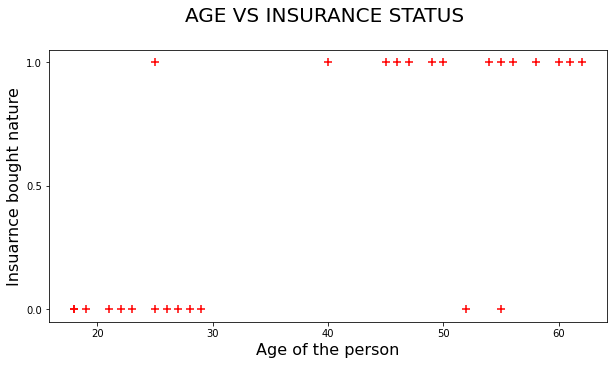

In [18]:
#plottting the graph

ptr.figure(figsize=(10, 5))

ptr.scatter(data['age'], data['bought_insurance'], marker='+', color= "red", s= 50)

ptr.xlabel('Age of the person', fontsize= 16)
ptr.ylabel('Insuarnce bought nature', fontsize= 16)
ptr.title('AGE VS INSURANCE STATUS \n', fontsize= 20)

ptr.yticks([0, 0.5, 1])

ptr.show()


In [72]:
#It's a classification problem
# we can use  logistic regresion

#Lets Create some training and testing data sets first

x= DataFrame(data= data, columns=['age'])
y= DataFrame(data= data, columns=['bought_insurance'])

x_train, x_test, y_train, y_test= train_test_split(x, y, train_size= 0.7)

reg= LogisticRegression().fit(x_train, y_train) 

print(reg.predict(x_test))

print(y_test)



[1 0 1 1 0 1 0 1 1]
    bought_insurance
6                  0
18                 0
9                  1
7                  1
21                 0
3                  0
0                  0
24                 1
25                 1


c:\Users\NITIN VERMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EXERCISE

In [106]:
hr_data= pd.read_csv('HR_comma_sep.csv')
hr_data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


<AxesSubplot:xlabel='salary'>

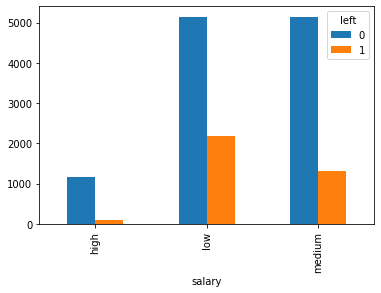

In [107]:
pd.crosstab(hr_data.salary, hr_data.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

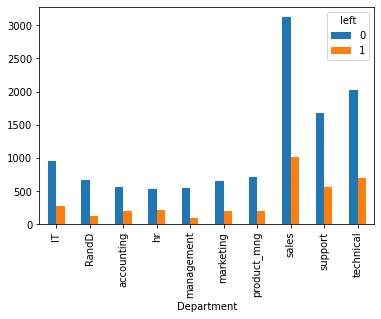

In [108]:
pd.crosstab(hr_data.Department, hr_data.left).plot(kind='bar')

In [92]:
hr_data.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [109]:
salary_dummy= pd.get_dummies(hr_data['salary'])
department_dummy= pd.get_dummies(hr_data['Department'])

merged= pd.concat([hr_data, salary_dummy, department_dummy], axis='columns')

merged.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#remove unnecessary info
del merged['Department']
del merged['salary']

#drop one of the dummy variable to avoid the dummy variable trap

del merged['technical']

In [152]:
merged.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [124]:
# Create Data frames for features and target

features= DataFrame(data= merged, columns=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
'Work_accident', 'promotion_last_5years', 'high', 'low', 'medium', 'IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support'
])


In [125]:
features.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [126]:
target= DataFrame(data= merged, columns=['left'])

In [140]:
import warnings
warnings.simplefilter("ignore")

regression= LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000).fit(features, target)

regression.score(features, target)


0.7603840256017068

In [162]:
regression.predict([[0.4, 0.53, 2, 157, 3, 0, 0,0,1, 0,0, 0, 0,0,0,0,0,1, 0]])


array([0], dtype=int64)